Dataset

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel('/content/fix data ta.xlsx', index_col=0)
df.head()

,Berat,Tinggi,ZS BB/U,ZS TB/U,ZS BB/TB,Label
No,,,,,,
1,20.00,116.0,1.36,2.64,-0.42,0.0
2,22.95,98.0,4.49,1.28,5.38,0.0
3,15.76,93.0,0.93,-0.61,1.77,0.0
4,16.20,112.0,0.41,2.85,-1.97,0.0
5,15.00,99.0,-0.82,-1.36,0.04,0.0


In [ ]:
for i in df.columns:
  print(i)

Berat
Tinggi
ZS BB/U
ZS TB/U
ZS BB/TB
Label


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2255 entries, 1 to 2255
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Berat     2255 non-null   float64
 1   Tinggi    2255 non-null   float64
 2   ZS BB/U   2255 non-null   float64
 3   ZS TB/U   2255 non-null   float64
 4   ZS BB/TB  2255 non-null   float64
 5   Label     2248 non-null   float64
dtypes: float64(6)
memory usage: 123.3 KB


In [ ]:
df.head()

,Berat,Tinggi,ZS BB/U,ZS TB/U,ZS BB/TB,Label
No,,,,,,
1,20.00,116.0,1.36,2.64,-0.42,0.0
2,22.95,98.0,4.49,1.28,5.38,0.0
3,15.76,93.0,0.93,-0.61,1.77,0.0
4,16.20,112.0,0.41,2.85,-1.97,0.0
5,15.00,99.0,-0.82,-1.36,0.04,0.0


In [ ]:
df = df.dropna()

In [ ]:
df.describe()

,Berat,Tinggi,ZS BB/U,ZS TB/U,ZS BB/TB,Label
count,2248.00000,2248.000000,2248.000000,2248.000000,2248.000000,2248.000000
mean,39.87399,87.045596,-0.753723,-0.789297,0.917318,0.069840
std,471.86557,14.803859,1.100866,1.246520,36.545706,0.254934
min,1.60000,40.000000,-5.780000,-5.840000,-5.720000,0.000000
25%,9.20000,77.000000,-1.440000,-1.590000,-1.130000,0.000000
50%,12.10000,89.000000,-0.740000,-0.940000,-0.420000,0.000000
75%,14.70000,99.000000,-0.030000,-0.080000,0.220000,0.000000
max,9674.00000,120.000000,4.490000,5.570000,999.990000,1.000000


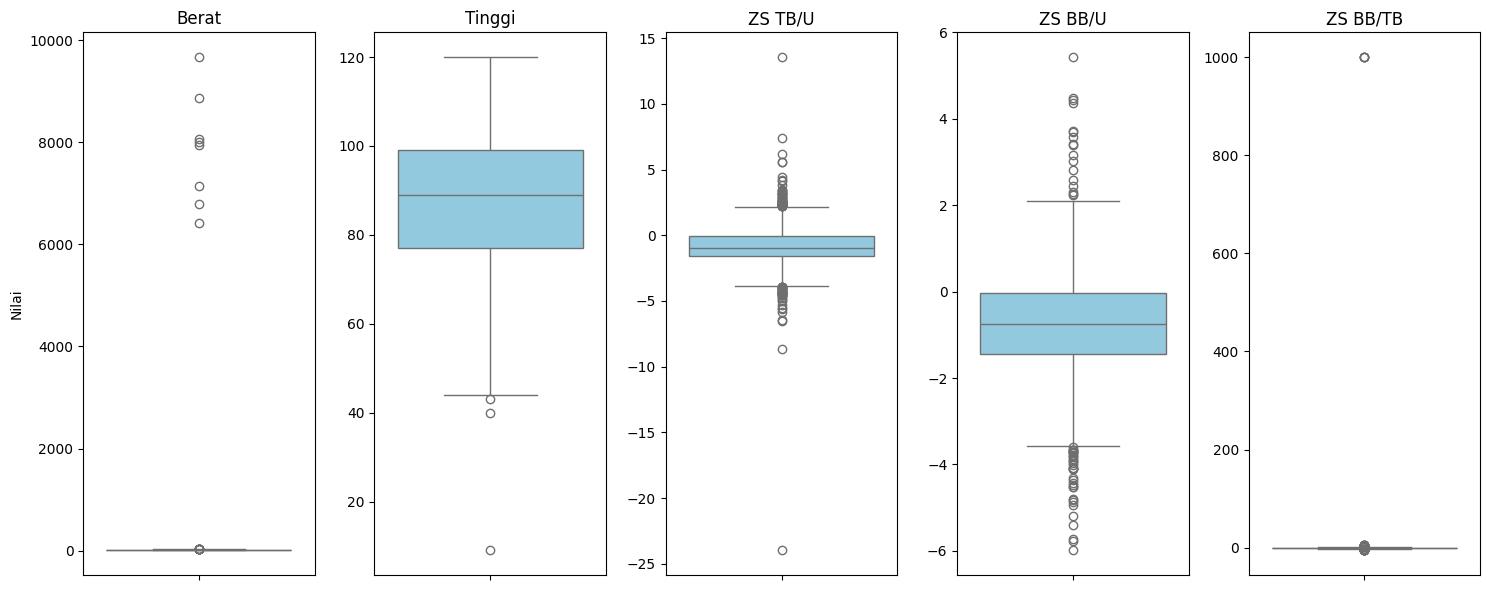

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Memuat data dari file Excel
file_path = '/content/fix data ta.xlsx'  # Ganti dengan lokasi file Anda
df = pd.read_excel(file_path)

# Kolom yang akan divisualisasikan
columns_to_plot = ['Berat', 'Tinggi', 'ZS TB/U', 'ZS BB/U', 'ZS BB/TB']

# Atur ukuran plot
plt.figure(figsize=(15, 6))

# Buat boxplot untuk setiap kolom
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(1, len(columns_to_plot), i)
    sns.boxplot(data=df[column], color="skyblue") # Changed df_clean to df
    plt.title(column)
    plt.ylabel('Nilai' if i == 1 else '')  # Hanya menampilkan label pada subplot pertama

plt.tight_layout()
plt.show()

In [ ]:
# Fungsi untuk menangani outlier menggunakan metode IQR
def handle_outliers_with_iqr(df, features):
    for feature in features:
        Q1 = df[feature].quantile(0.25)  # Kuartil pertama (25%)
        Q3 = df[feature].quantile(0.75)  # Kuartil ketiga (75%)
        IQR = Q3 - Q1  # Rentang antar kuartil (Interquartile Range)

        # Batas bawah dan atas untuk mendeteksi outlier
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Ganti nilai outlier dengan median
        median = df[feature].median()
        df[feature] = df[feature].apply(lambda x: median if x < lower_bound or x > upper_bound else x)
    return df

# Daftar fitur yang akan ditangani outliernya
features = ['Berat', 'Tinggi', 'ZS TB/U', 'ZS BB/U', 'ZS BB/TB']

# Panggil fungsi untuk menangani outlier pada DataFrame
df = handle_outliers_with_iqr(df, features)

# Tampilkan hasil setelah menangani outlier
print("Data setelah menangani outlier menggunakan IQR:")
print(df[features].describe())


Data setelah menangani outlier menggunakan IQR:
             Berat       Tinggi      ZS TB/U      ZS BB/U     ZS BB/TB
count  2255.000000  2255.000000  2255.000000  2255.000000  2255.000000
mean     11.844905    87.070687    -0.822475    -0.729925    -0.434399
std       3.632590    14.738225     1.027848     0.964699     0.946499
min       1.600000    44.000000    -3.850000    -3.580000    -3.140000
25%       9.200000    77.000000    -1.550000    -1.400000    -1.110000
50%      12.000000    89.000000    -0.940000    -0.740000    -0.420000
75%      14.500000    99.000000    -0.160000    -0.040000     0.190000
max      22.400000   120.000000     2.190000     2.090000     2.230000


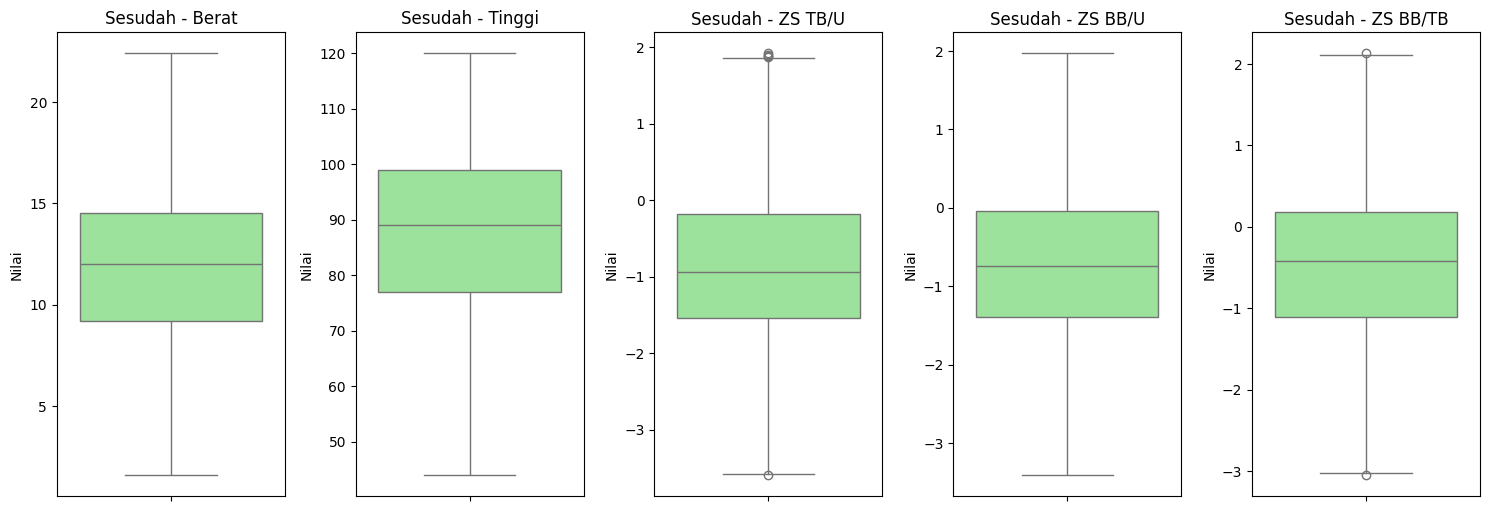

In [ ]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Fungsi untuk menangani outlier menggunakan metode IQR
def handle_outliers_with_iqr(df, features):
    for feature in features:
        Q1 = df[feature].quantile(0.25)  # Kuartil pertama (25%)
        Q3 = df[feature].quantile(0.75)  # Kuartil ketiga (75%)
        IQR = Q3 - Q1  # Rentang antar kuartil (Interquartile Range)

        # Batas bawah dan atas untuk mendeteksi outlier
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Ganti nilai outlier dengan median
        median = df[feature].median()
        df[feature] = df[feature].apply(lambda x: median if x < lower_bound or x > upper_bound else x)
    return df

# Fungsi untuk visualisasi boxplot sebelum dan sesudah penanganan outlier
def visualize_outliers(df_original, df_handled, features):
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(features, 1):

        # Visualisasi sesudah penanganan outlier
        plt.subplot(2, len(features), i + len(features))
        sns.boxplot(y=df_handled[feature], color='lightgreen')
        plt.title(f"Sesudah - {feature}")
        plt.ylabel('Nilai')

    plt.tight_layout()
    plt.show()

# Simpan DataFrame asli untuk perbandingan sebelum penanganan outlier
df_original = df.copy()

# Daftar fitur yang akan ditangani outliernya
features = ['Berat', 'Tinggi', 'ZS TB/U', 'ZS BB/U', 'ZS BB/TB']

# Tangani outlier menggunakan IQR
df = handle_outliers_with_iqr(df, features)

# Visualisasikan hasil sebelum dan sesudah penanganan outlier
visualize_outliers(df_original, df, features)


Deklarasi X dan Y

In [ ]:
X = df.drop('Label', axis=1)
y = df['Label']

Connect Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Data Sampling menggunakan ADASYN

In [ ]:
import os
import pandas as pd
import numpy as np
import random
from collections import Counter
from sklearn.model_selection import train_test_split

In [ ]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X, y)

# size sesudah sampling
print("Ukuran Training Set setelah ADASYN Sampling:", X_adasyn.shape)
print("Distribusi label pada Training Set setelah ADASYN Sampling:", Counter(y_adasyn))

# Convert the resampled X_train_adasyn and y_train_clustered to DataFrame
train_adasyn = pd.DataFrame(X_adasyn, columns=X.columns)  # Convert X_train_adasyn to DataFrame
train_adasyn['Label'] = y_adasyn

# Define the path where you want to save the file
file_path = '/content/drive/My Drive/TAA/Data Stunting Fix adasyn.csv'

# Check if the directory exists; if not, create it
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)  # Create the directory if it doesn't exist

# Now save the DataFrame to the specified path
train_adasyn.to_csv(file_path, index=False)

print(f"Dataset berhasil disimpan ke Google Drive di lokasi: {file_path}")

Ukuran Training Set setelah ADASYN Sampling: (1388, 6)
Distribusi label pada Training Set setelah ADASYN Sampling: Counter({1.0: 694, 0.0: 694})
Dataset berhasil disimpan ke Google Drive di lokasi: /content/drive/My Drive/TAA/Data Stunting Fix adasyn.csv


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The ADASYN or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


K-fold

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
import os
from collections import Counter

In [ ]:
df_cluster = pd.read_csv('/content/drive/My Drive/TAA/Data Stunting Fix adasyn.csv')

# Tentukan jumlah klaster dan jumlah fold
num_clusters = 10
num_folds = 5

# Split data menjadi klaster
clusters_X = np.array_split(X, num_clusters)
clusters_y = np.array_split(y, num_clusters)

# Buat objek KFold dengan jumlah fold yang diinginkan
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Loop melalui setiap fold dan buat subset data berdasarkan klaster
fold = 1
for train_index, test_index in kf.split(range(num_clusters)):
    # Ambil klaster untuk training dan testing berdasarkan indeks
    X_train_fold = np.concatenate([clusters_X[i] for i in train_index], axis=0)
    y_train_fold = np.concatenate([clusters_y[i] for i in train_index], axis=0)
    X_test_fold = np.concatenate([clusters_X[i] for i in test_index], axis=0)
    y_test_fold = np.concatenate([clusters_y[i] for i in test_index], axis=0)

    # Buat DataFrame dari training set
    train_fold_df = pd.DataFrame(X_train_fold, columns=X.columns)
    train_fold_df['Label'] = y_train_fold

    # Hapus baris NaN pada training set
    train_fold_df = train_fold_df.dropna()

    # Buat DataFrame dari testing set
    test_fold_df = pd.DataFrame(X_test_fold, columns=X.columns)
    test_fold_df['Label'] = y_test_fold

    # Hapus baris NaN pada testing set
    test_fold_df = test_fold_df.dropna()

    # Display ukuran dataset setelah split
    print(f"Fold {fold}:")
    print("Ukuran Training Set:", train_fold_df.shape)
    print("Distribusi label pada Training Set:", Counter(train_fold_df['Label']))
    print("Ukuran Test Set:", test_fold_df.shape)
    print("Distribusi label pada Test Set:", Counter(test_fold_df['Label']))

    # Tentukan path untuk menyimpan file setiap fold
    train_file_path = f'/content/drive/My Drive/TAA/train_clustered_fold{fold}.csv'
    test_file_path = f'/content/drive/My Drive/TAA/test_clustered_fold{fold}.csv'

    # Cek apakah direktori ada; jika tidak, buat
    directory = os.path.dirname(train_file_path)
    if not os.path.exists(directory):
        os.makedirs(directory)

    # Simpan data train dan test setiap fold ke dalam file CSV
    train_fold_df.to_csv(train_file_path, index=False)
    test_fold_df.to_csv(test_file_path, index=False)

    print(f"Dataset untuk Fold {fold} berhasil disimpan ke Google Drive di lokasi: {train_file_path} dan {test_file_path}")
    fold += 1


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


Fold 1:
Ukuran Training Set: (1111, 7)
Distribusi label pada Training Set: Counter({0.0: 566, 1.0: 545})
Ukuran Test Set: (277, 7)
Distribusi label pada Test Set: Counter({1.0: 149, 0.0: 128})
Dataset untuk Fold 1 berhasil disimpan ke Google Drive di lokasi: /content/drive/My Drive/TAA/train_clustered_fold1.csv dan /content/drive/My Drive/TAA/test_clustered_fold1.csv
Fold 2:
Ukuran Training Set: (1110, 7)
Distribusi label pada Training Set: Counter({1.0: 592, 0.0: 518})
Ukuran Test Set: (278, 7)
Distribusi label pada Test Set: Counter({0.0: 176, 1.0: 102})
Dataset untuk Fold 2 berhasil disimpan ke Google Drive di lokasi: /content/drive/My Drive/TAA/train_clustered_fold2.csv dan /content/drive/My Drive/TAA/test_clustered_fold2.csv
Fold 3:
Ukuran Training Set: (1110, 7)
Distribusi label pada Training Set: Counter({0.0: 563, 1.0: 547})
Ukuran Test Set: (278, 7)
Distribusi label pada Test Set: Counter({1.0: 147, 0.0: 131})
Dataset untuk Fold 3 berhasil disimpan ke Google Drive di lokasi: /

In [ ]:
dfTrain = pd.read_csv('/content/drive/MyDrive/TAA/train_clustered_fold1.csv')
dfTest = pd.read_csv('/content/drive/MyDrive/TAA/test_clustered_fold1.csv')

# Summary of the splits
print("Training set size:", len(dfTrain))
print("Test set size:", len(dfTest))

Training set size: 1111
Test set size: 277


Training dan Testing Model Random Forest Menggunakan Dataset hasil k-fold

In [ ]:
# Unique values across all columns
df = pd.read_csv(f'/content/drive/MyDrive/TAA/train_clustered_fold1.csv')
unique_values_all = {col: df[col].unique() for col in df.columns}
print(unique_values_all)

Fold 1:
  Akurasi = 0.9097
  Precision = 0.9769
  Recall = 0.8523
  F1-Score = 0.9104
  Confusion Matrix:
[[125   3]
 [ 22 127]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.98      0.91       128
         1.0       0.98      0.85      0.91       149

    accuracy                           0.91       277
   macro avg       0.91      0.91      0.91       277
weighted avg       0.92      0.91      0.91       277

Fold 2:
  Akurasi = 0.9029
  Precision = 0.8049
  Recall = 0.9706
  F1-Score = 0.8800
  Confusion Matrix:
[[152  24]
 [  3  99]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.86      0.92       176
         1.0       0.80      0.97      0.88       102

    accuracy                           0.90       278
   macro avg       0.89      0.92      0.90       278
weighted avg       0.92      0.90      0.90       278

Fold 3:
  Akurasi = 0.9137
  Precision

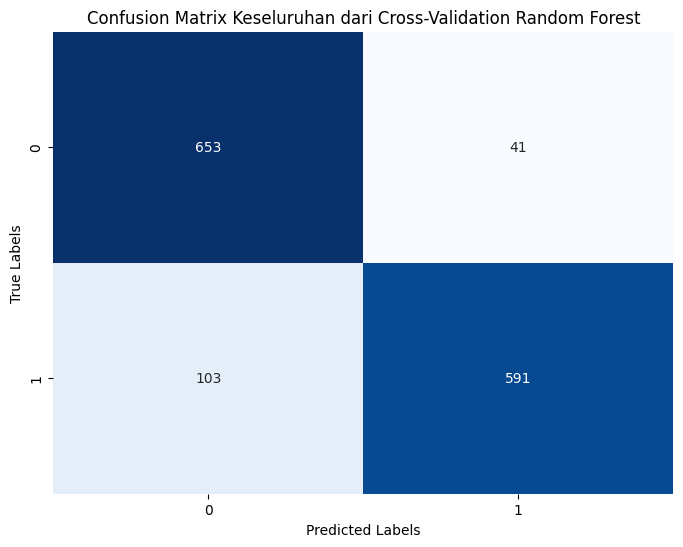

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Inisialisasi variabel untuk menyimpan metrik tiap fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
total_confusion_matrix = np.zeros((2, 2), dtype=int)  # Menyesuaikan ukuran matriks dengan jumlah kelas

# Loop melalui setiap fold
for index in range(1, 6) :
  df_train = pd.read_csv(f'/content/drive/MyDrive/TAA/train_clustered_fold{index}.csv')

  X_train_fold = df_train.drop('Label', axis=1)
  y_train_fold = df_train['Label']

  df_test = pd.read_csv(f'/content/drive/MyDrive/TAA/test_clustered_fold{index}.csv')

  X_test_fold = df_test.drop('Label', axis=1)
  y_test_fold = df_test['Label']

  # Inisialisasi dan latih model Random Forest pada data training fold saat ini
  model = RandomForestClassifier(n_estimators=10, random_state=42)
  model.fit(X_train_fold, y_train_fold)

  # Prediksi pada data test
  y_pred = model.predict(X_test_fold)

  # Hitung metrik evaluasi untuk setiap fold
  accuracy = accuracy_score(y_test_fold, y_pred)
  precision = precision_score(y_test_fold, y_pred, average='binary')
  recall = recall_score(y_test_fold, y_pred, average='binary')
  f1 = f1_score(y_test_fold, y_pred, average='binary')

  # Simpan metrik ke dalam list masing-masing
  accuracy_scores.append(accuracy)
  precision_scores.append(precision)
  recall_scores.append(recall)
  f1_scores.append(f1)

  # Hitung confusion matrix untuk fold ini dan tambahkan ke total
  cm = confusion_matrix(y_test_fold, y_pred)
  total_confusion_matrix += cm

  # Tampilkan hasil metrik pada setiap fold
  print(f"Fold {index}:")
  print(f"  Akurasi = {accuracy:.4f}")
  print(f"  Precision = {precision:.4f}")
  print(f"  Recall = {recall:.4f}")
  print(f"  F1-Score = {f1:.4f}")
  print(f"  Confusion Matrix:\n{cm}\n")

  # Tampilkan classification report untuk setiap fold
  print("Classification Report:\n", classification_report(y_test_fold, y_pred))

# Hitung dan tampilkan rata-rata dari seluruh fold
average_accuracy = np.mean(accuracy_scores)
average_precision = np.mean(precision_scores)
average_recall = np.mean(recall_scores)
average_f1 = np.mean(f1_scores)

print(f"Rata-rata dari {num_folds}-Fold Cross-Validation:")
print(f"  Akurasi = {average_accuracy:.4f}")
print(f"  Precision = {average_precision:.4f}")
print(f"  Recall = {average_recall:.4f}")
print(f"  F1-Score = {average_f1:.4f}")

# Tampilkan confusion matrix keseluruhan
print("Confusion Matrix Keseluruhan:")
print(total_confusion_matrix)

# Visualisasi confusion matrix keseluruhan
plt.figure(figsize=(8, 6))
sns.heatmap(total_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Keseluruhan dari Cross-Validation Random Forest")
plt.show()

Naive Bayes Gaussian k-fold

Fold 1:
  Akurasi = 0.9242
  Precision = 0.8951
  Recall = 0.9732
  F1-Score = 0.9325
  Confusion Matrix:
[[111  17]
 [  4 145]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.87      0.91       128
         1.0       0.90      0.97      0.93       149

    accuracy                           0.92       277
   macro avg       0.93      0.92      0.92       277
weighted avg       0.93      0.92      0.92       277

Fold 2:
  Akurasi = 0.8849
  Precision = 0.7612
  Recall = 1.0000
  F1-Score = 0.8644
  Confusion Matrix:
[[144  32]
 [  0 102]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.82      0.90       176
         1.0       0.76      1.00      0.86       102

    accuracy                           0.88       278
   macro avg       0.88      0.91      0.88       278
weighted avg       0.91      0.88      0.89       278

Fold 3:
  Akurasi = 0.8525
  Precision =

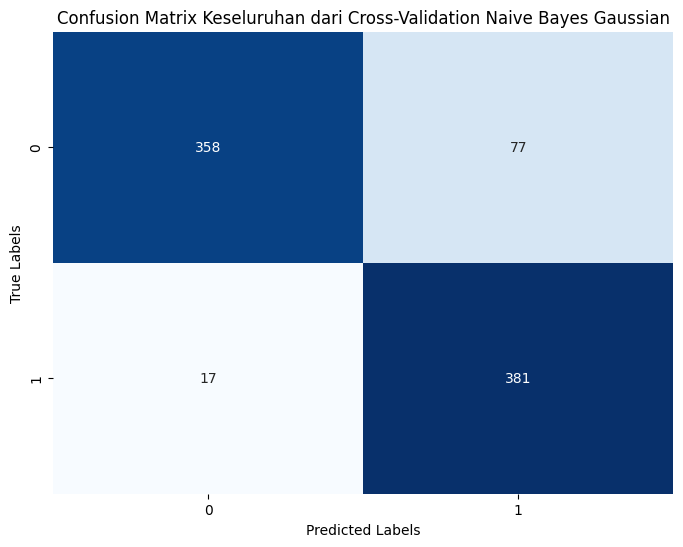

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Inisialisasi variabel untuk menyimpan metrik tiap fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
total_confusion_matrix = np.zeros((2, 2), dtype=int)  # Menyesuaikan ukuran matriks dengan jumlah kelas

# Loop melalui setiap fold
for index in range(1, 4) :
  df_train = pd.read_csv(f'/content/drive/MyDrive/TAA/train_clustered_fold{index}.csv')

  X_train_fold = df_train.drop('Label', axis=1)
  y_train_fold = df_train['Label']

  df_test = pd.read_csv(f'/content/drive/MyDrive/TAA/test_clustered_fold{index}.csv')

  X_test_fold = df_test.drop('Label', axis=1)
  y_test_fold = df_test['Label']

  # Inisialisasi dan latih model Gaussian Naive Bayes pada data training fold saat ini
  model = GaussianNB()
  model.fit(X_train_fold, y_train_fold)

  # Prediksi pada data test
  y_pred = model.predict(X_test_fold)

  # Hitung metrik evaluasi untuk setiap fold
  accuracy = accuracy_score(y_test_fold, y_pred)
  precision = precision_score(y_test_fold, y_pred, average='binary')
  recall = recall_score(y_test_fold, y_pred, average='binary')
  f1 = f1_score(y_test_fold, y_pred, average='binary')

  # Simpan metrik ke dalam list masing-masing
  accuracy_scores.append(accuracy)
  precision_scores.append(precision)
  recall_scores.append(recall)
  f1_scores.append(f1)

  # Hitung confusion matrix untuk fold ini dan tambahkan ke total
  cm = confusion_matrix(y_test_fold, y_pred)
  total_confusion_matrix += cm

  # Tampilkan hasil metrik dan classification report pada setiap fold
  print(f"Fold {index}:")
  print(f"  Akurasi = {accuracy:.4f}")
  print(f"  Precision = {precision:.4f}")
  print(f"  Recall = {recall:.4f}")
  print(f"  F1-Score = {f1:.4f}")
  print(f"  Confusion Matrix:\n{cm}")
  print("Classification Report:\n", classification_report(y_test_fold, y_pred))

# Hitung dan tampilkan rata-rata dari seluruh fold
average_accuracy = np.mean(accuracy_scores)
average_precision = np.mean(precision_scores)
average_recall = np.mean(recall_scores)
average_f1 = np.mean(f1_scores)

print(f"\nRata-rata dari {num_folds}-Fold Cross-Validation:")
print(f"  Akurasi = {average_accuracy:.4f}")
print(f"  Precision = {average_precision:.4f}")
print(f"  Recall = {average_recall:.4f}")
print(f"  F1-Score = {average_f1:.4f}")

# Tampilkan confusion matrix keseluruhan
print("\nConfusion Matrix Keseluruhan:")
print(total_confusion_matrix)

# Visualisasi confusion matrix keseluruhan
plt.figure(figsize=(8, 6))
sns.heatmap(total_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Keseluruhan dari Cross-Validation Naive Bayes Gaussian")
plt.show()


Naive Bayes Bernoulli k-fold

Fold 1:
  Akurasi = 0.6895
  Precision = 0.6721
  Recall = 0.8255
  F1-Score = 0.7410
  Confusion Matrix:
[[ 68  60]
 [ 26 123]]

Fold 2:
  Akurasi = 0.6223
  Precision = 0.4898
  Recall = 0.7059
  F1-Score = 0.5783
  Confusion Matrix:
[[101  75]
 [ 30  72]]

Fold 3:
  Akurasi = 0.7230
  Precision = 0.6823
  Recall = 0.8912
  F1-Score = 0.7729
  Confusion Matrix:
[[ 70  61]
 [ 16 131]]

Rata-rata dari 5-Fold Cross-Validation:
  Akurasi = 0.6783
  Precision = 0.6147
  Recall = 0.8075
  F1-Score = 0.6974
Confusion Matrix Keseluruhan:
[[239 196]
 [ 72 326]]


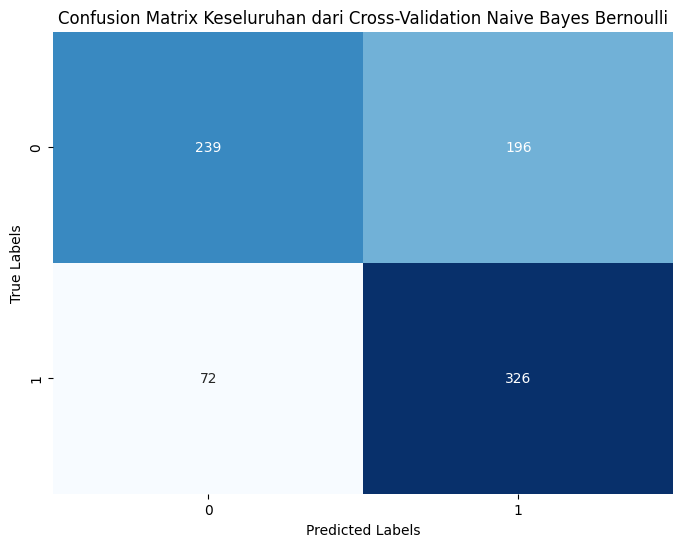

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Inisialisasi variabel untuk menyimpan metrik tiap fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
total_confusion_matrix = np.zeros((2, 2), dtype=int)  # Menyesuaikan ukuran matriks dengan jumlah kelas

# Loop melalui setiap fold
for index in range(1, 4) :
  df_train = pd.read_csv(f'/content/drive/MyDrive/TAA/train_clustered_fold{index}.csv')

  X_train_fold = df_train.drop('Label', axis=1)
  y_train_fold = df_train['Label']

  df_test = pd.read_csv(f'/content/drive/MyDrive/TAA/test_clustered_fold{index}.csv')

  X_test_fold = df_test.drop('Label', axis=1)
  y_test_fold = df_test['Label']

  # Inisialisasi dan latih model Bernoulli Naive Bayes pada data training fold saat ini
  model = BernoulliNB()
  model.fit(X_train_fold, y_train_fold)

  # Prediksi pada data test
  y_pred = model.predict(X_test_fold)

  # Hitung metrik evaluasi untuk setiap fold
  accuracy = accuracy_score(y_test_fold, y_pred)
  precision = precision_score(y_test_fold, y_pred, average='binary')  # Untuk data biner
  recall = recall_score(y_test_fold, y_pred, average='binary')
  f1 = f1_score(y_test_fold, y_pred, average='binary')

  # Simpan metrik ke dalam list masing-masing
  accuracy_scores.append(accuracy)
  precision_scores.append(precision)
  recall_scores.append(recall)
  f1_scores.append(f1)

  # Hitung confusion matrix untuk fold ini dan tambahkan ke total
  cm = confusion_matrix(y_test_fold, y_pred)
  total_confusion_matrix += cm

  # Tampilkan hasil metrik pada setiap fold
  print(f"Fold {index}:")
  print(f"  Akurasi = {accuracy:.4f}")
  print(f"  Precision = {precision:.4f}")
  print(f"  Recall = {recall:.4f}")
  print(f"  F1-Score = {f1:.4f}")
  print(f"  Confusion Matrix:\n{cm}\n")

# Hitung dan tampilkan rata-rata dari seluruh fold
average_accuracy = np.mean(accuracy_scores)
average_precision = np.mean(precision_scores)
average_recall = np.mean(recall_scores)
average_f1 = np.mean(f1_scores)

print(f"Rata-rata dari {num_folds}-Fold Cross-Validation:")
print(f"  Akurasi = {average_accuracy:.4f}")
print(f"  Precision = {average_precision:.4f}")
print(f"  Recall = {average_recall:.4f}")
print(f"  F1-Score = {average_f1:.4f}")

# Tampilkan confusion matrix keseluruhan
print("Confusion Matrix Keseluruhan:")
print(total_confusion_matrix)

# Visualisasi confusion matrix keseluruhan
plt.figure(figsize=(8, 6))
sns.heatmap(total_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Keseluruhan dari Cross-Validation Naive Bayes Bernoulli")
plt.show()